In [45]:
import time
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict, Counter
from copy import deepcopy

In [52]:



class Analysis:
    def __init__(self, playerNames=['Player 1', 'Player 2', 'Player 3', 'Player 4']):

        self.ActionsOfPlayers = defaultdict(list)
        self.GamesAndPlayers = {}
        self.game = 0

    def set_game(self, game_number):
        self.game = game_number
        
    def end_game(self):
        self.GamesAndPlayers[self.game] = deepcopy(self.ActionsOfPlayers)

    def record_action(self, action_name, Player_id):

        self.ActionsOfPlayers[Player_id].append(action_name)


    def generate_plot(self):
        actions_count = {}
        for i in self.ActionsOfPlayers:
            actions_count[i] = Counter(self.ActionsOfPlayers[i])

        temp_count = list(actions_count.keys())
        fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharey=True)
        fig.suptitle('Actions of Players')

        for i in range(4):
            row = i // 2
            col = i % 2
            ax = axs[row, col]
            x = []
            y = []
            for k, v in actions_count[temp_count[i]].items():
                x.append(k)
                y.append(v)
            ax.bar(x, y,  color=['red', 'green', 'blue', 'orange'])

            ax.set_title('Player {}'.format(i+1))
            ax.set_xlabel('Actions')
            ax.set_ylabel('Count')
            ax.set_xticklabels(x, rotation = 20)

        plt.tight_layout()
        plt.show()



                

/var/folders/0x/45s0xqcj0w30vthlrf9wbtqh0000gn/T/ipykernel_24210/3599610871.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation = 20)
/var/folders/0x/45s0xqcj0w30vthlrf9wbtqh0000gn/T/ipykernel_24210/3599610871.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation = 20)
/var/folders/0x/45s0xqcj0w30vthlrf9wbtqh0000gn/T/ipykernel_24210/3599610871.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation = 20)
/var/folders/0x/45s0xqcj0w30vthlrf9wbtqh0000gn/T/ipykernel_24210/3599610871.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation = 20)


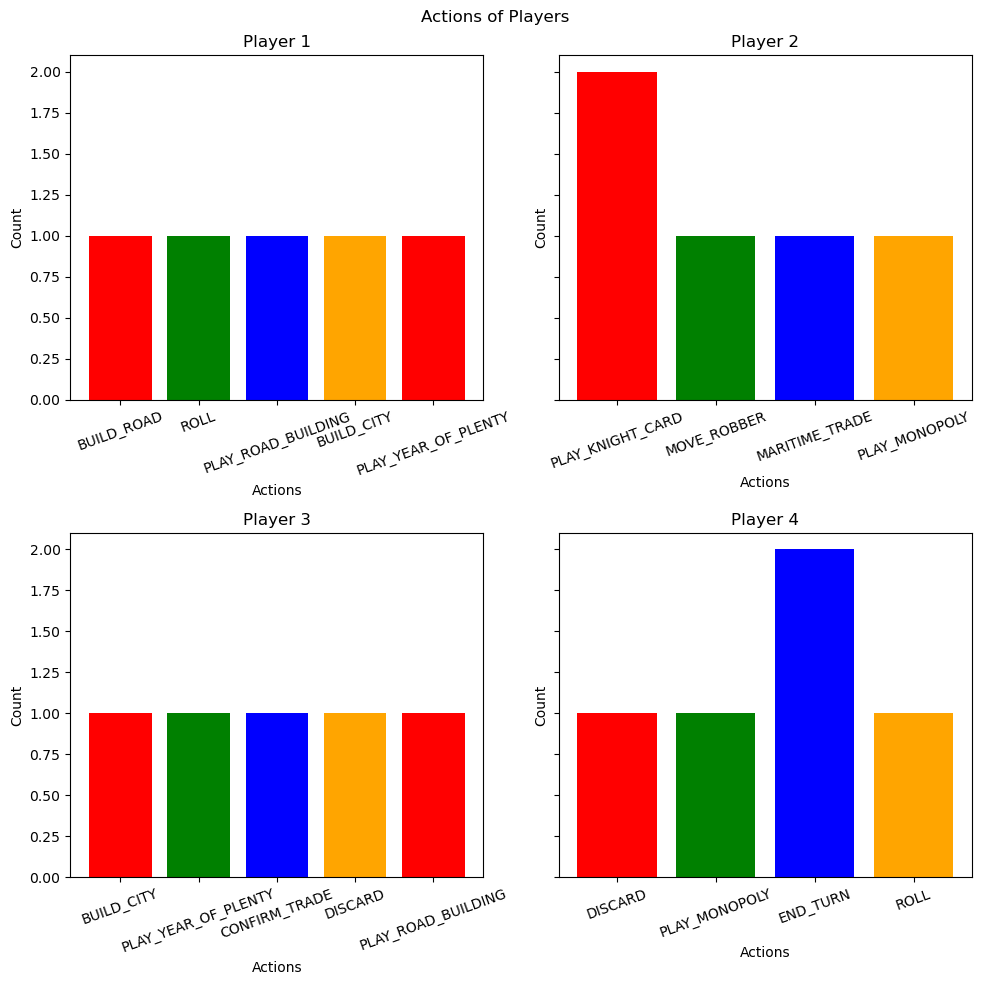

In [53]:
# action_map = {'BUILD_ROAD': 1, 'BUILD_CITY': 2, 'BUILD_SETTLEMENT': 3, 'DISCARD': 4, 'ROLL': 5, 'MOVE_ROBBER': 6,
#              'PLAY_KNIGHT_CARD': 7, 'PLAY_YEAR_OF_PLENTY': 8, 'PLAY_MONOPOLY': 9, 'PLAY_ROAD_BUILDING': 10,
#              'MARITIME_TRADE': 11, 'CONFIRM_TRADE': 12, 'END_TURN': 13} 
# action_color_map = {'BUILD_ROAD':'yellow','BUILD_CITY': 'blue','BUILD_SETTLEMENT': 'green','DISCARD': 'black','ROLL': 'orange',
#                     'MOVE_ROBBER': 'purple', 'PLAY_KNIGHT_CARD': 'pink','PLAY_YEAR_OF_PLENTY': 'brown','PLAY_MONOPOLY': 'gray',
#                     'PLAY_ROAD_BUILDING': 'teal','MARITIME_TRADE': 'magenta','CONFIRM_TRADE': 'cyan', 'END_TURN': 'red'
# }
analysis = Analysis()


# Set the game number and record some actions
analysis.set_game(1)
analysis.record_action('BUILD_ROAD', 1)
analysis.record_action('PLAY_KNIGHT_CARD', 2)
analysis.record_action('BUILD_CITY', 3)
analysis.record_action('DISCARD', 4)
analysis.record_action('ROLL', 1)
analysis.record_action('MOVE_ROBBER', 2)
analysis.record_action('PLAY_YEAR_OF_PLENTY', 3)
analysis.record_action('PLAY_MONOPOLY', 4)
analysis.record_action('PLAY_ROAD_BUILDING', 1)
analysis.record_action('MARITIME_TRADE', 2)
analysis.record_action('CONFIRM_TRADE', 3)
analysis.record_action('END_TURN', 4)
analysis.record_action('BUILD_CITY', 1)
analysis.record_action('PLAY_KNIGHT_CARD', 2)
analysis.record_action('DISCARD', 3)
analysis.record_action('ROLL', 4)
analysis.record_action('PLAY_YEAR_OF_PLENTY', 1)
analysis.record_action('PLAY_MONOPOLY', 2)
analysis.record_action('PLAY_ROAD_BUILDING', 3)
analysis.record_action('END_TURN', 4)
analysis.generate_plot()
#Needs to be edited to incorporate actions per player and the colors line acounts for the amount of actions

In [51]:
 ROLL = "ROLL"  # value is None. Log instead sets it to (int, int) rolled.
    MOVE_ROBBER = "MOVE_ROBBER"  # value is (coordinate, Color|None). Log has extra element of card stolen.
    DISCARD = "DISCARD"  # value is None|Resource[]. TODO: Should always be Resource[].

    # Building/Buying
    BUILD_ROAD = "BUILD_ROAD"  # value is edge_id
    BUILD_SETTLEMENT = "BUILD_SETTLEMENT"  # value is node_id
    BUILD_CITY = "BUILD_CITY"  # value is node_id
    BUY_DEVELOPMENT_CARD = "BUY_DEVELOPMENT_CARD"  # value is None. Log value is card

    # Dev Card Plays
    PLAY_KNIGHT_CARD = "PLAY_KNIGHT_CARD"  # value is None
    PLAY_YEAR_OF_PLENTY = "PLAY_YEAR_OF_PLENTY"  # value is (Resource, Resource)
    PLAY_MONOPOLY = "PLAY_MONOPOLY"  # value is Resource
    PLAY_ROAD_BUILDING = "PLAY_ROAD_BUILDING"  # value is None

    # ===== Trade
    # MARITIME_TRADE value is 5-resouce tuple, where last resource is resource asked.
    #   resources in index 2 and 3 might be None, denoting a port-trade.
    MARITIME_TRADE = "MARITIME_TRADE"
    # Domestic Trade (player to player trade)
    # Values for all three is a 10-resource tuple, first 5 is offered freqdeck, last 5 is
    #   receiving freqdeck.
    OFFER_TRADE = "OFFER_TRADE"
    ACCEPT_TRADE = "ACCEPT_TRADE"
    REJECT_TRADE = "REJECT_TRADE"
    # CONFIRM_TRADE value is 11-tuple. first 10 as in OFFER_TRADE, last is color of accepting player
    CONFIRM_TRADE = "CONFIRM_TRADE"
    CANCEL_TRADE = "CANCEL_TRADE"  # value is None

    END_TURN = "END_TURN"  # value is None

IndentationError: unexpected indent (671293351.py, line 2)

In [ ]:
test_data = [    ["Action 1", "ID 1"],
    ["Action 2", "ID 2"],
    ["Action 3", "ID 3"],
    ["Action 4", "ID 4"],
    ["Action 5", "ID 1"],
    ["Action 6", "ID 2"],
    ["Action 7", "ID 3"],
    ["Action 1", "ID 4"],
    ["Action 2", "ID 1"],
    ["Action 3", "ID 2"],
    ["Action 4", "ID 3"],
    ["Action 5", "ID 4"],
    ["Action 6", "ID 1"],
    ["Action 7", "ID 2"],
    ["Action 1", "ID 3"],
    ["Action 2", "ID 4"],
    ["Action 3", "ID 1"],
    ["Action 4", "ID 2"],
    ["Action 5", "ID 3"],
    ["Action 6", "ID 4"],
    ["Action 7", "ID 1"]